<a href="https://colab.research.google.com/github/karthikr-0706/Covid-19-detection/blob/main/Xray_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lakshivs","key":"259c5751fb820becd8724a5192ff1e33"}'}

In [ ]:
! mkdir ~/.kaggle # creating kaggle directorty

! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json  # giving necessary permissions

In [ ]:
! kaggle datasets list


ref                                                           title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
patricklford/global-ev-sales-2010-2024                        Global EV Sales: 2010-2024                        83KB  2024-07-19 13:40:22           1758         24  1.0              
marius2303/nissan-all-models-price-prediction-dataset         Nissan All Models Price Prediction Dataset       811KB  2024-07-27 11:50:10            872         24  1.0              
waqi786/global-air-quality-dataset                            Global Air Quality Dataset 🌍🌫️                   258KB  2024-07-28 10:35:09           1227         29  1.0              
rabieelkharoua/students-performance-dataset                   📚 Students Performance 

In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database   # dowloading dataset

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
License(s): copyright-authors
100% 776M/778M [00:25<00:00, 39.2MB/s]
100% 778M/778M [00:25<00:00, 31.6MB/s]


In [ ]:
!unzip /content/covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [ ]:
!mkdir -p Training
!mkdir Training/images-COVID
!mkdir Training/images-Lung_Opacity
!mkdir Training/images-Normal
!mkdir Training/images-Viral_Pneumonia

In [ ]:
!cp -r /content/COVID-19_Radiography_Dataset/COVID/images/* /content/Training/images-COVID
!cp -r /content/COVID-19_Radiography_Dataset/Lung_Opacity/images/* /content/Training/images-Lung_Opacity
!cp -r /content/COVID-19_Radiography_Dataset/Normal/images/* /content/Training/images-Normal


In [ ]:
!cp -r "/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images"/* /content/Training/images-Viral_Pneumonia

# Data Agumentation

In [ ]:
# import the nececessary lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
# data augmentation for the training variable

train_datagen = ImageDataGenerator(rescale =1./255,zoom_range=0.2,horizontal_flip = True,validation_split=0.3)


In [ ]:
# data augmentation for the testing variable

test_datagen = ImageDataGenerator(rescale =1./255,validation_split=0.3)

In [ ]:
x_train = train_datagen.flow_from_directory('/content/Training',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100,
                                            subset='training')

Found 14818 images belonging to 4 classes.


In [ ]:
x_test = test_datagen.flow_from_directory('/content/Training',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100,
                                           subset='validation')

Found 6347 images belonging to 4 classes.


In [ ]:
x_train.class_indices

{'images-COVID': 0,
 'images-Lung_Opacity': 1,
 'images-Normal': 2,
 'images-Viral_Pneumonia': 3}

In [ ]:
x_test.class_indices

{'images-COVID': 0,
 'images-Lung_Opacity': 1,
 'images-Normal': 2,
 'images-Viral_Pneumonia': 3}

# CNN Modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten,Dense
import tensorflow as tf

In [ ]:
# adding layers

model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))  #convolution layer
model.add(MaxPooling2D(pool_size =(2,2)))  # maxpooling layer
model.add(Flatten())  # flatten layer

model.add(Dense(300,activation ='relu')) # hidden layer 1
model.add(Dense(150,activation ='relu')) # hidden layer 2

model.add(Dense(4,activation ='softmax')) # output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the model
model.compile(optimizer = 'adam',loss= 'categorical_crossentropy',metrics =['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │       9,225,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             604 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,272,550 (35.37 MB)

 Trainable params: 9,272,550 (35.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
model.fit_generator(x_train,steps_per_epoch= len(x_train),epochs = 10,validation_data = x_test,validation_steps = len(x_test))


AttributeError: 'Sequential' object has no attribute 'fit_generator'

In [ ]:
# Training the model
model.fit(x_train, epochs=10, validation_data=x_test)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


149/149 ━━━━━━━━━━━━━━━━━━━━ 154s 988ms/step - accuracy: 0.5389 - loss: 1.3383 - val_accuracy: 0.6991 - val_loss: 0.7321
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.6911 - loss: 0.7520 - val_accuracy: 0.7528 - val_loss: 0.6223
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 147s 971ms/step - accuracy: 0.7347 - loss: 0.6558 - val_accuracy: 0.7444 - val_loss: 0.6270
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 199s 952ms/step - accuracy: 0.7471 - loss: 0.6239 - val_accuracy: 0.7695 - val_loss: 0.5812
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 202s 954ms/step - accuracy: 0.7673 - loss: 0.5838 - val_accuracy: 0.7700 - val_loss: 0.5860
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 203s 963ms/step - accuracy: 0.7712 - loss: 0.5832 - val_accuracy: 0.7848 - val_loss: 0.5476
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.7893 - loss: 0.5331 - val_accuracy: 0.8108 - val_loss: 0.4894
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.8033 - loss: 0.5114 - val_

In [ ]:
# save the model

model.save('xrayprediction.h5')

# Model Testing

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

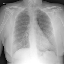

In [ ]:
# testing 1
img1 = image.load_img('/content/Training/images-COVID/COVID-1083.png',target_size =(64,64))
img1


In [ ]:
x = image.img_to_array(img1)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['Covid','Lung Opacity','Normal ','Viral Pneumonia']
op[pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


'Normal '

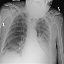

In [ ]:
# testing 2
img2 = image.load_img('/content/COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-1137.png',target_size =(64,64))
img2

In [ ]:
x = image.img_to_array(img2)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['Covid','Lung Opacity','Normal ','Viral Pneumonia']
op[pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'Normal '

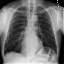

In [ ]:
# testing 3
img3 = image.load_img('/content/COVID-19_Radiography_Dataset/Normal/images/Normal-10135.png',target_size =(64,64))
img3

In [ ]:
x = image.img_to_array(img3)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op  =['Covid','Lung Opacity','Normal ','Viral Pneumonia']
op[pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


'Normal '

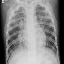

In [ ]:
# testing 4
img4 = image.load_img('/content/COVID-19_Radiography_Dataset/Viral Pneumonia/images/Viral Pneumonia-110.png',target_size =(64,64))
img4

In [ ]:
x = image.img_to_array(img4)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['Covid','Lung Opacity','Normal ','Viral Pneumonia']
op[pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


'Viral Pneumonia'

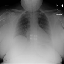

In [ ]:
# testing 5
img5 = image.load_img('/content/COVID-19_Radiography_Dataset/Normal/images/Normal-10006.png',target_size =(64,64))
img5

In [ ]:
x = image.img_to_array(img5)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['Covid','Lung Opacity','Normal ','Viral Pneumonia']
op[pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


'Normal '

# Performance Metrices


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming y_true and y_pred are your true and predicted labels, respectively
y_true = x_test.classes
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1 score
class_report = classification_report(y_true, y_pred, target_names=x_test.class_indices)
print("Classification Report:")
print(class_report)


64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 361ms/step
Accuracy: 37.64%
Confusion Matrix:
[[ 140  301  578   65]
 [ 206  497 1016   84]
 [ 359  795 1733  170]
 [  51   91  242   19]]
Classification Report:
                        precision    recall  f1-score   support

          images-COVID       0.19      0.13      0.15      1084
   images-Lung_Opacity       0.30      0.28      0.29      1803
         images-Normal       0.49      0.57      0.52      3057
images-Viral_Pneumonia       0.06      0.05      0.05       403

              accuracy                           0.38      6347
             macro avg       0.26      0.25      0.25      6347
          weighted avg       0.35      0.38      0.36      6347

